# Comparing age sources

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.ticker import MultipleLocator

from apogee_sample import APOGEESample
import paths
from _globals import TWO_COLUMN_WIDTH

In [2]:
sample = APOGEESample.load()
sample()

,APOGEE_ID,RA,DEC,GALR,GALPHI,GALZ,SNREV,TEFF,TEFF_ERR,LOGG,...,C_N,C_N_ERR,CN_AGE,CN_AGE_ERR,CN_LOG_AGE,CN_LOG_AGE_ERR,L23_AGE,L23_AGE_ERR,L23_LOG_AGE,L23_LOG_AGE_ERR
0,2M00000068+5710233,0.002850,57.173164,8.458404,175.658285,-0.040749,282.74594,5031.2637,10.145057,3.456132,...,-0.109907,0.024025,NaN,NaN,NaN,NaN,3.713866,1.315107,0.569826,0.138561
1,2M00000133+5721163,0.005558,57.354549,11.953869,153.654715,-0.470835,120.29548,4974.6010,15.310856,2.388251,...,-0.312257,0.042614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2M00000211+6327470,0.008802,63.463078,12.858291,151.396933,0.169356,169.02042,4681.4634,8.766338,2.245527,...,-0.526230,0.020749,1.261146,1.64,0.100765,0.564759,NaN,NaN,NaN,NaN
3,2M00000222+5625359,0.009287,56.426662,9.217623,168.311742,-0.185231,129.40749,5049.7686,14.194268,3.291666,...,-0.133700,0.032615,NaN,NaN,NaN,NaN,1.241603,0.066435,0.093983,0.031293
4,2M00000446+5854329,0.018603,58.909149,10.505168,160.196856,-0.203834,144.98238,4766.6274,10.474075,2.420902,...,-0.310579,0.024317,3.908851,1.64,0.592049,0.182213,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171630,2M23595669+6131251,359.986225,61.523659,9.939371,163.650440,-0.015894,154.12479,5008.3950,13.106046,2.480740,...,-0.333050,0.034828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171631,2M23595676+7918072,359.986523,79.302002,9.415115,168.484293,0.676923,446.47790,4311.3926,6.555767,1.731429,...,-0.057909,0.020354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171632,2M23595837+5700444,359.993224,57.012356,10.694221,159.021606,-0.358826,101.53675,4954.1700,15.750314,2.474665,...,-0.344606,0.040020,2.463685,1.64,0.391585,0.289097,NaN,NaN,NaN,NaN
171633,2M23595886+5726058,359.995265,57.434956,9.328103,167.511337,-0.163006,232.91826,4859.9087,9.050734,2.480687,...,-0.262194,0.022607,4.063301,1.64,0.608879,0.175287,NaN,NaN,NaN,NaN


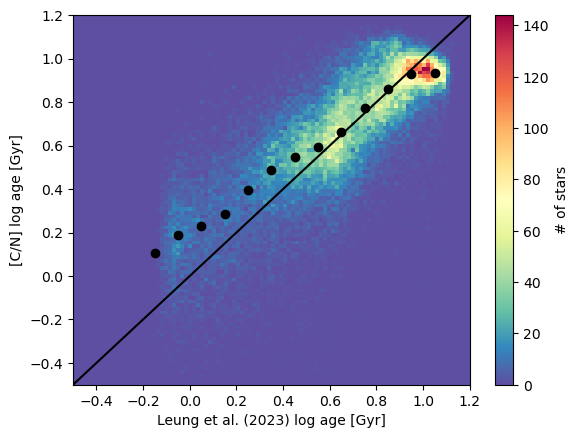

In [3]:
data = sample.data[pd.notna(sample.data['L23_AGE']) & pd.notna(sample.data['CN_AGE'])]

fig, ax = plt.subplots()
h, xedges, yedges, im = ax.hist2d(
    data['L23_LOG_AGE'], data['CN_LOG_AGE'], range=[[-0.5, 1.2], [-0.5, 1.2]], 
    bins=100, cmap='Spectral_r', #norm='log'
)
log_age_bins = np.arange(-0.5, 1.2, 0.1)
log_cn_age_medians = sample.binned_intervals(
    'CN_LOG_AGE', 'L23_LOG_AGE', log_age_bins, quantiles=[0.5]
)[0.5]
ax.plot(log_age_bins[:-1] + 0.05, log_cn_age_medians, 'ko')
fig.colorbar(im, ax=ax, label='# of stars')
ax.plot([-1, 2], [-1, 2], 'k-')
ax.set_xlabel('Leung et al. (2023) log age [Gyr]')
ax.set_ylabel('[C/N] log age [Gyr]')
plt.show()

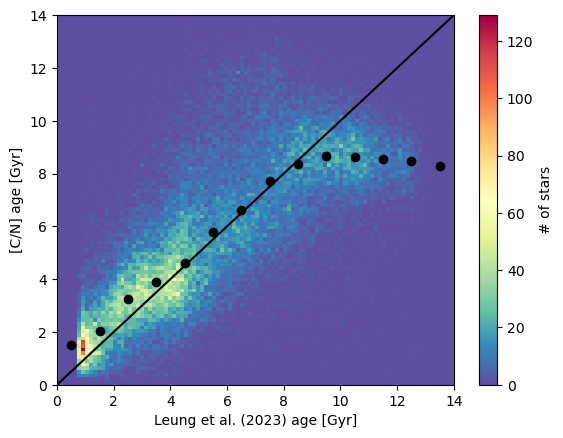

In [4]:
fig, ax = plt.subplots()
h, xedges, yedges, im = ax.hist2d(
    data['L23_AGE'], data['CN_AGE'], range=[[0, 14], [0, 14]], bins=100, 
    cmap='Spectral_r', #norm='log'
)
fig.colorbar(im, ax=ax, label='# of stars')
age_bins = np.arange(0, 15, 1)
cn_age_medians = sample.binned_intervals(
    'CN_AGE', 'L23_AGE', age_bins, quantiles=[0.5]
)[0.5]
ax.plot(age_bins[:-1] + 0.5, cn_age_medians, 'ko')
ax.plot([0, 14], [0, 14], 'k-')
ax.set_xlabel('Leung et al. (2023) age [Gyr]')
ax.set_ylabel('[C/N] age [Gyr]')
plt.show()

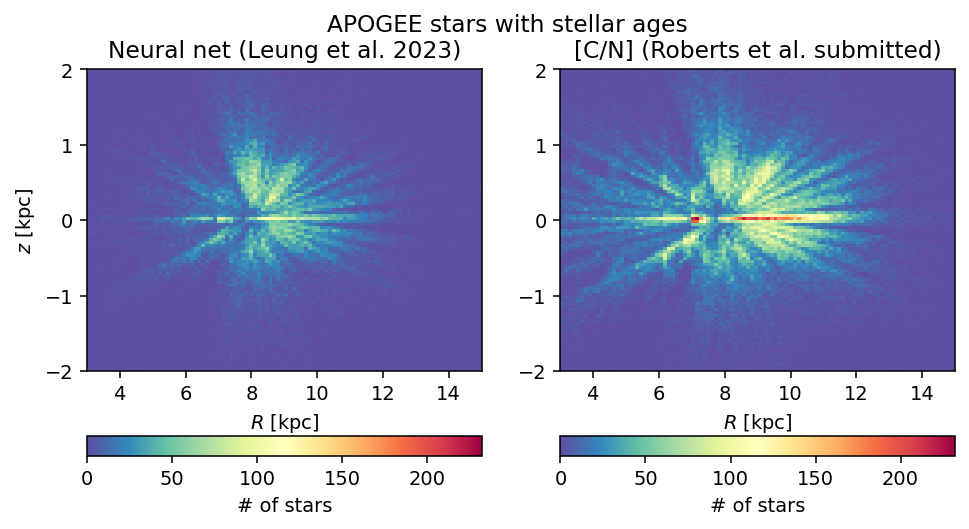

In [5]:
extent = [[3, 15], [-2, 2]]
cmap = 'Spectral_r'
bins = 100
fig, axs = plt.subplots(1, 2, figsize=(8, 4), dpi=140)
has_cn_age = sample.data[pd.notna(sample.data['CN_AGE'])]
h, xedges, yedges, im1 = axs[1].hist2d(
    has_cn_age['GALR'], has_cn_age['GALZ'], 
    range=extent, bins=bins, cmap=cmap, #norm='log',
)
fig.colorbar(im1, ax=axs[1], label='# of stars', orientation='horizontal')
axs[1].set_title('[C/N] (Roberts et al. submitted)')
has_nn_age = sample.data[pd.notna(sample.data['L23_AGE'])]
h, xedges, yedges, im0 = axs[0].hist2d(
    has_nn_age['GALR'], has_nn_age['GALZ'], 
    range=extent, bins=bins, cmap=cmap, norm=im1.norm,
)
fig.colorbar(im0, ax=axs[0], label='# of stars', orientation='horizontal')
axs[0].set_title('Neural net (Leung et al. 2023)')
axs[0].set_xlabel(r'$R$ [kpc]')
axs[1].set_xlabel(r'$R$ [kpc]')
axs[0].set_ylabel(r'$z$ [kpc]')
fig.suptitle('APOGEE stars with stellar ages')
plt.show()

## Age errors

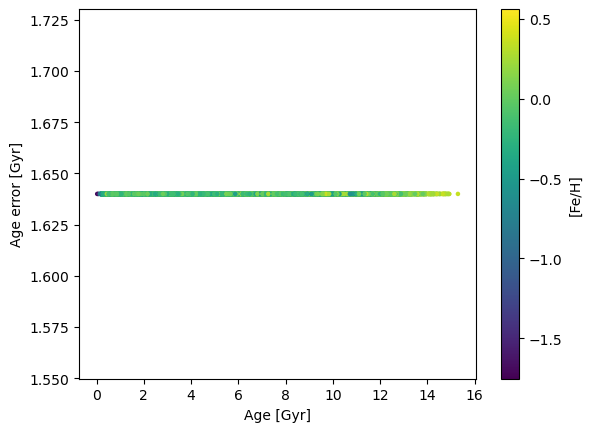

In [6]:
fig, ax = plt.subplots()
pc = ax.scatter(sample('CN_AGE'), sample('CN_AGE_ERR'), s=5, c=sample('FE_H'))
fig.colorbar(pc, ax=ax, label='[Fe/H]')
# ax.set_ylim((0, 5))
ax.set_xlabel('Age [Gyr]')
ax.set_ylabel('Age error [Gyr]')
plt.show()

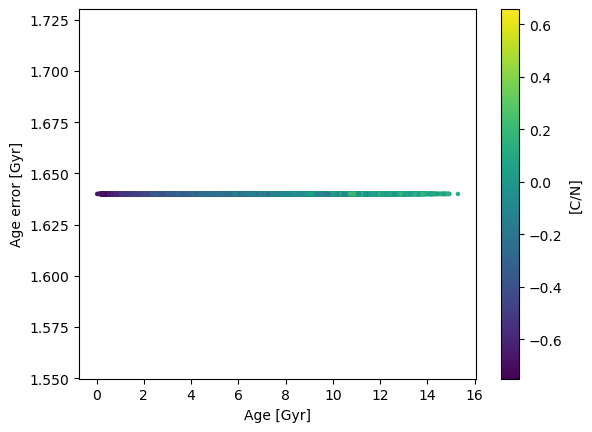

In [7]:
fig, ax = plt.subplots()
pc = ax.scatter(sample('CN_AGE'), sample('CN_AGE_ERR'), s=5, c=sample('C_N'))
fig.colorbar(pc, ax=ax, label='[C/N]')
# ax.set_ylim((0, 5))
ax.set_xlabel('Age [Gyr]')
ax.set_ylabel('Age error [Gyr]')
plt.show()

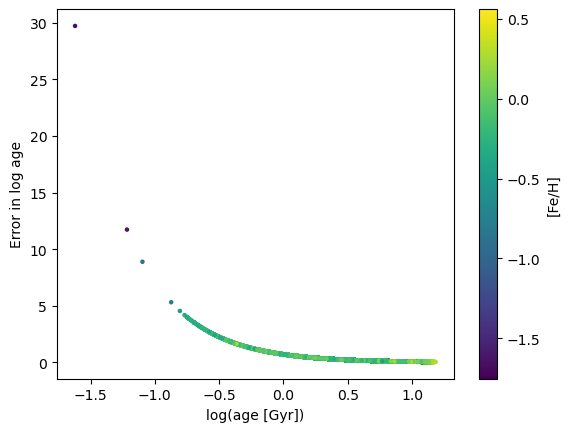

In [8]:
fig, ax = plt.subplots()
pc = ax.scatter(sample('CN_LOG_AGE'), sample('CN_LOG_AGE_ERR'), s=5, c=sample('FE_H'))
fig.colorbar(pc, ax=ax, label='[Fe/H]')
# ax.set_ylim((0, 5))
ax.set_xlabel('log(age [Gyr])')
ax.set_ylabel('Error in log age')
plt.show()

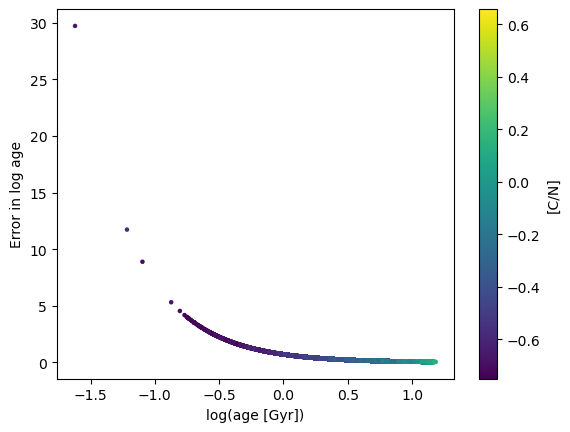

In [9]:
fig, ax = plt.subplots()
pc = ax.scatter(sample('CN_LOG_AGE'), sample('CN_LOG_AGE_ERR'), s=5, c=sample('C_N'))
fig.colorbar(pc, ax=ax, label='[C/N]')
# ax.set_ylim((0, 5))
ax.set_xlabel('log(age [Gyr])')
ax.set_ylabel('Error in log age')
plt.show()

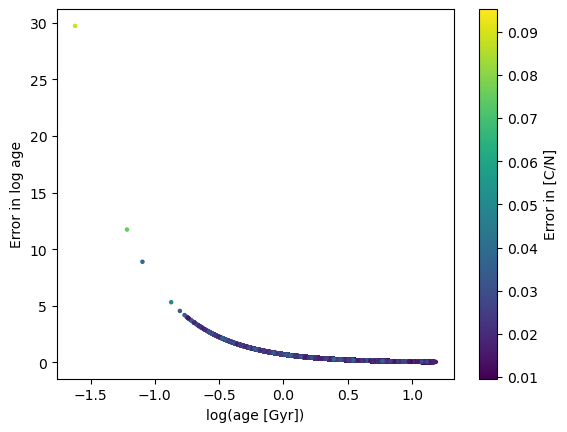

In [10]:
fig, ax = plt.subplots()
pc = ax.scatter(sample('CN_LOG_AGE'), sample('CN_LOG_AGE_ERR'), s=5, c=sample('C_N_ERR'))
fig.colorbar(pc, ax=ax, label='Error in [C/N]')
# ax.set_ylim((0, 5))
ax.set_xlabel('log(age [Gyr])')
ax.set_ylabel('Error in log age')
plt.show()

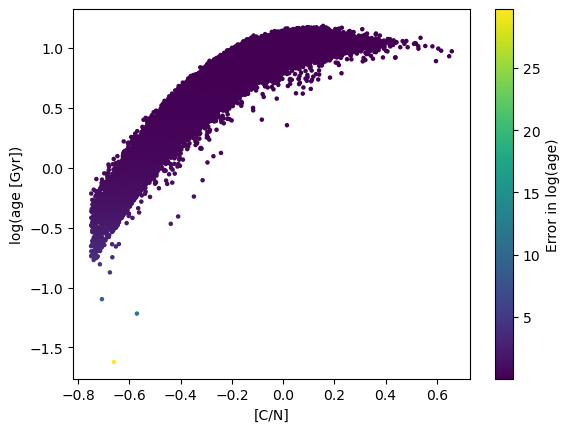

In [11]:
fig, ax = plt.subplots()
pc = ax.scatter(sample('C_N'), sample('CN_LOG_AGE'), s=5, c=sample('CN_LOG_AGE_ERR'))
fig.colorbar(pc, ax=ax, label='Error in log(age)')
# ax.set_ylim((0, 5))
ax.set_xlabel('[C/N]')
ax.set_ylabel('log(age [Gyr])')
plt.show()

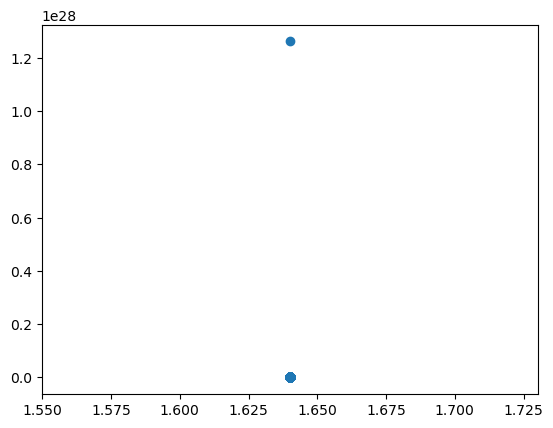

In [12]:
plt.scatter(
    sample('CN_AGE_ERR'), 
    10 ** (sample('CN_LOG_AGE') + sample('CN_LOG_AGE_ERR')) - 10**(sample('CN_LOG_AGE'))
)

Text(0, 0.5, 'Error in linear age')

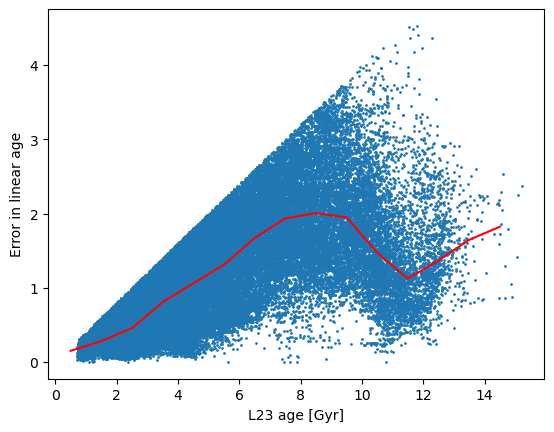

In [13]:
plt.scatter(sample.data['L23_AGE'], sample.data['L23_AGE_ERR'], s=1)
medians = []
for i in range(15):
    age_lim = (i, i+1)
    mono_age = sample.filter({'L23_AGE': age_lim})
    medians.append(mono_age('L23_AGE_ERR').median())
plt.plot(np.arange(0.5, 15, 1), medians, 'r-')
plt.xlabel('L23 age [Gyr]')
plt.ylabel('Error in linear age')

0.100301975


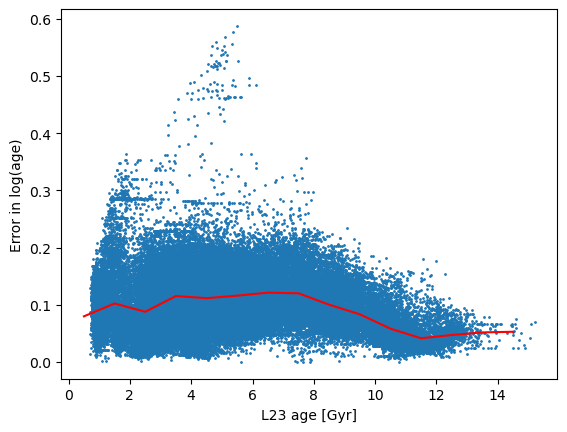

In [14]:
plt.scatter(sample.data['L23_AGE'], sample.data['L23_LOG_AGE_ERR'], s=1)
medians = []
for i in range(15):
    age_lim = (i, i+1)
    mono_age = sample.filter({'L23_AGE': age_lim})
    medians.append(mono_age('L23_LOG_AGE_ERR').median())
plt.plot(np.arange(0.5, 15, 1), medians, 'r-')
plt.xlabel('L23 age [Gyr]')
plt.ylabel('Error in log(age)')
print(sample('L23_LOG_AGE_ERR').median())

## Age-metallicity relations

In [61]:
# Solar neighborhood stars with age estimates from both methods
local_sample = sample.region(galr_lim=(7, 9), absz_lim=(0, 0.5))
local_data = local_sample.data[pd.notna(local_sample.data['L23_AGE']) & pd.notna(local_sample.data['CN_AGE'])]
local_data

,APOGEE_ID,RA,DEC,GALR,GALPHI,GALZ,SNREV,TEFF,TEFF_ERR,LOGG,...,C_N,C_N_ERR,CN_AGE,CN_AGE_ERR,CN_LOG_AGE,CN_LOG_AGE_ERR,L23_AGE,L23_AGE_ERR,L23_LOG_AGE,L23_LOG_AGE_ERR
1,2M00000866+7122144,0.036099,71.370689,8.704496,173.650654,0.194404,491.90616,4669.0810,7.625217,2.527280,...,-0.374867,0.018714,2.710345,1.64,0.433025,0.262787,6.893998,2.467813,0.838471,0.145866
3,2M00001809+5939417,0.075380,59.661602,8.954146,170.772680,-0.049402,117.58086,4971.1133,14.161119,3.040653,...,-0.383063,0.032906,2.514131,1.64,0.400388,0.283296,2.460851,0.574993,0.391085,0.100139
6,2M00002021+6302567,0.084227,63.049103,8.493744,175.460867,0.031571,832.49316,4931.4370,9.217795,2.626198,...,-0.399140,0.021242,2.538166,1.64,0.404520,0.280613,1.610244,0.243248,0.206892,0.063162
11,2M00004664+5523113,0.194344,55.386497,8.909140,170.944474,-0.162378,257.93808,4814.5550,8.810543,2.569550,...,-0.315845,0.022482,3.108591,1.64,0.492564,0.229121,4.084816,0.568740,0.611172,0.063306
12,2M00004849+8521299,0.202050,85.358322,8.568782,175.462693,0.353915,1307.54530,4824.7354,8.387991,2.548720,...,-0.326860,0.019154,3.851537,1.64,0.585634,0.184924,2.878900,0.264189,0.459227,0.038730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30310,2M23593035+1444283,359.876459,14.741221,8.232763,177.311702,-0.396147,441.09330,4939.8410,9.940225,3.086821,...,-0.066775,0.026248,7.229424,1.64,0.859104,0.098520,7.526196,1.816042,0.876576,0.133169
30311,2M23593160+7343113,359.881682,73.719826,8.851420,172.430898,0.287564,163.01994,4784.5200,9.293516,3.144188,...,-0.276278,0.019690,5.642469,1.64,0.751469,0.126229,4.974916,1.867037,0.696786,0.172447
30315,2M23594841+5653269,359.951711,56.890812,8.536125,174.761849,-0.058189,559.47595,4660.6465,7.747389,2.544573,...,-0.113534,0.019850,7.178260,1.64,0.856019,0.099222,7.658290,2.758648,0.884132,0.165442
30316,2M23595481+7509560,359.978414,75.165581,8.616469,174.634896,0.229559,498.81537,4824.3516,9.166178,2.718271,...,-0.081978,0.024877,6.736154,1.64,0.828412,0.105734,6.429371,2.465394,0.808168,0.182784


In [ ]:
# Calculate rolling medians
rolling_medians = []
sorted_nn_ages = local_data.sort_values('L23_AGE')[['L23_AGE', 'CN_AGE', 'O_H', 'FE_H', 'O_FE']]
rolling_medians.append(sorted_nn_ages.rolling(1000, min_periods=100, step=100).median())
sorted_cn_ages = local_data.sort_values('CN_AGE')[['CN_AGE', 'L23_AGE', 'O_H', 'FE_H', 'O_FE']]
rolling_medians.append(sorted_cn_ages.rolling(1000, min_periods=100, step=100).median())

In [82]:
sorted_nn_ages.iloc[-1000:]

,L23_AGE,CN_AGE,O_H,FE_H,O_FE
52,9.097492,5.350567,0.100771,0.044484,0.056287
28132,9.097788,9.537278,0.410177,0.326840,0.083337
18549,9.098104,6.759260,-0.012824,-0.074564,0.061740
802,9.098507,6.436051,0.209978,0.173860,0.036118
12794,9.103111,7.575749,-0.047607,-0.308460,0.260853
...,...,...,...,...,...
6245,12.898424,9.868349,-0.647627,-0.552870,-0.094757
17519,12.915170,0.459886,-0.701704,-0.555680,-0.146024
18343,12.951832,1.751575,-0.437907,-0.665110,0.227203
29842,13.020360,8.284932,-0.126527,-0.428730,0.302203


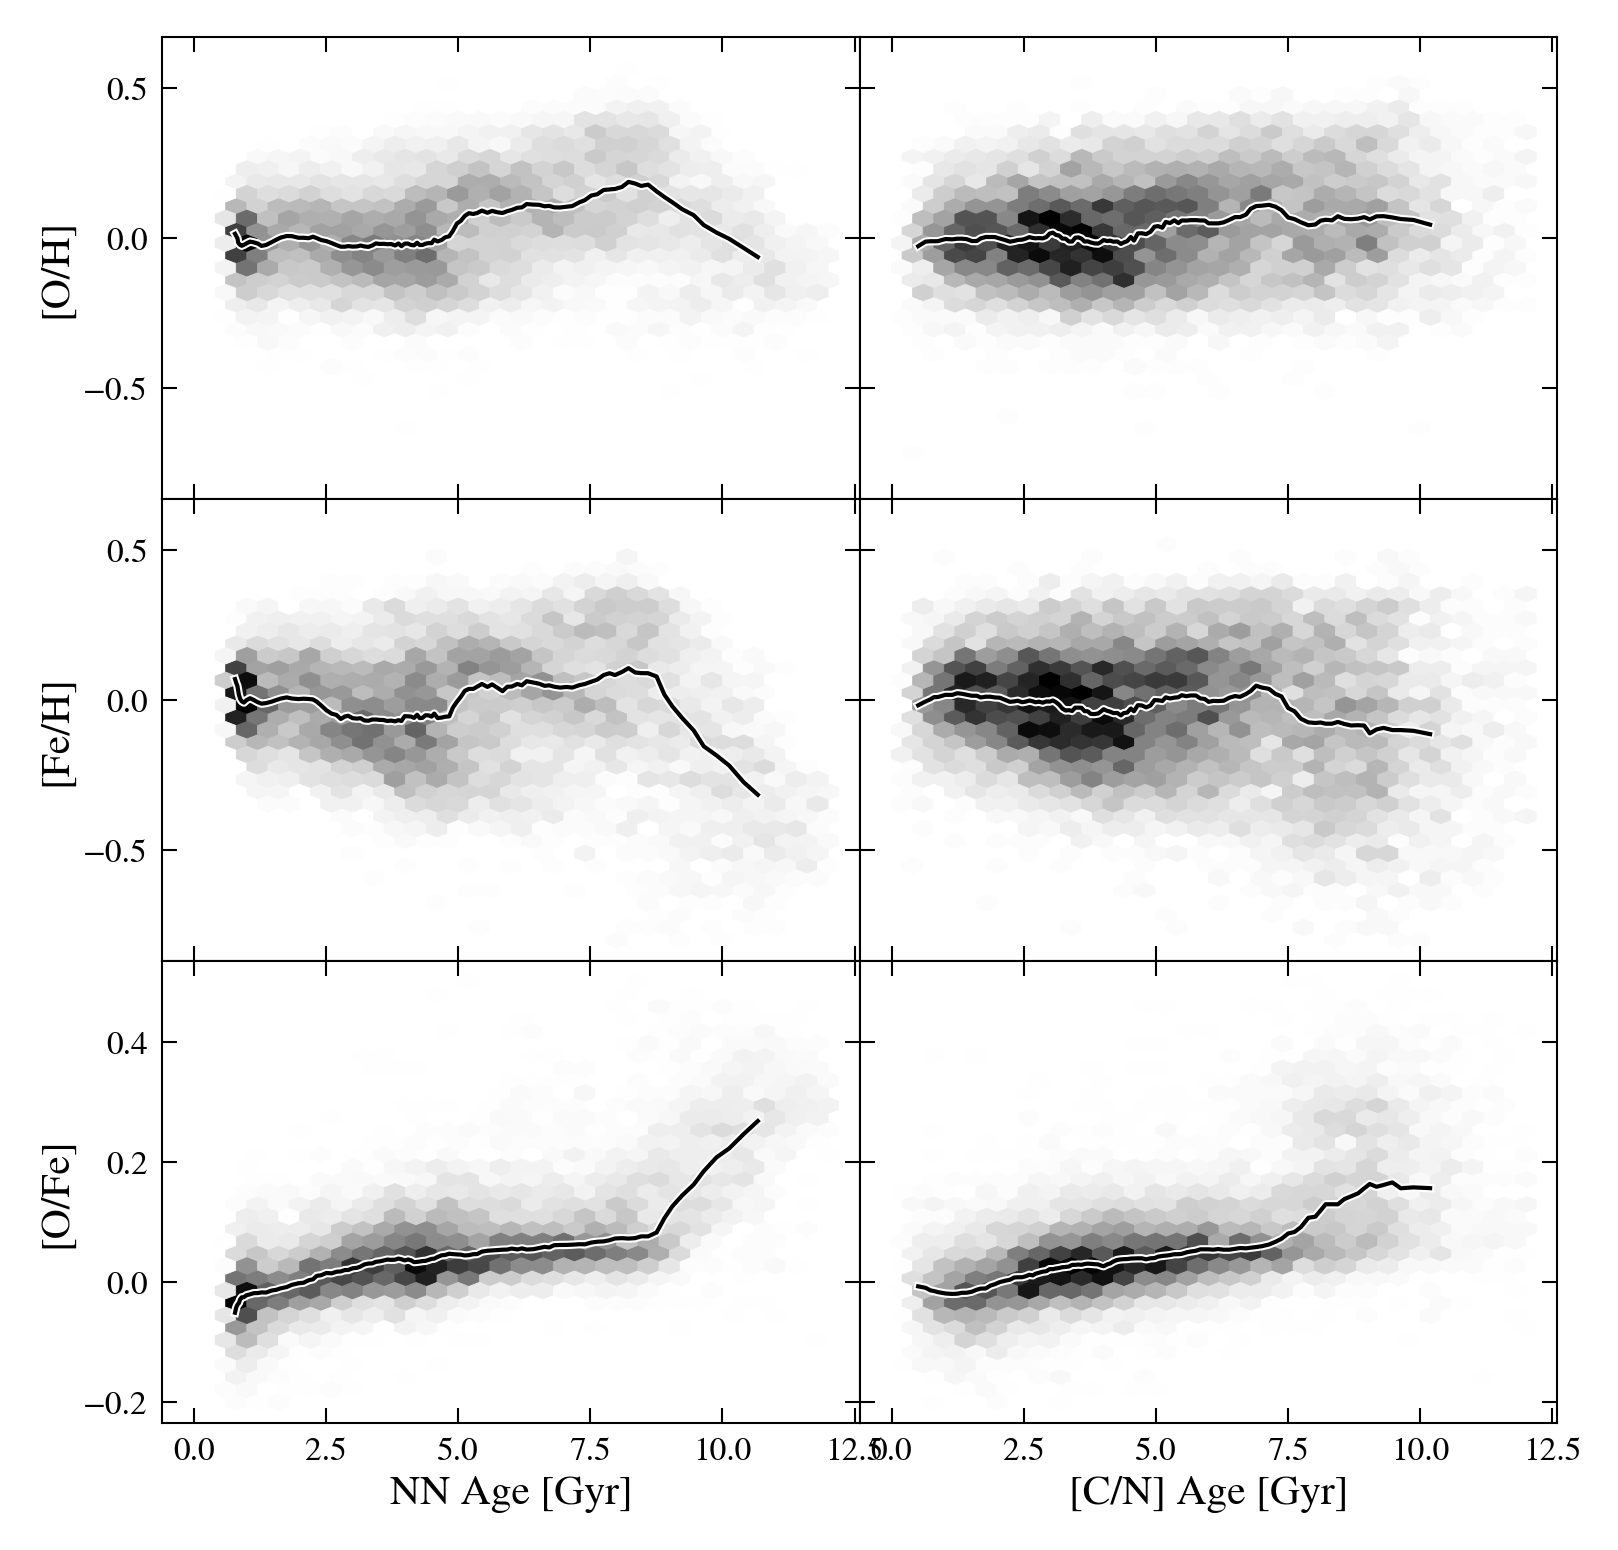

In [83]:
plt.style.use(paths.styles / 'paper.mplstyle')
fig, axs = plt.subplots(
    3, 2, 
    figsize=(6, 6), 
    sharex=True, sharey='row',
    gridspec_kw={'hspace': 0, 'wspace': 0}
)
cmap = 'binary'
gridsize = 30
age_lim=(0, 12)
oh_lim = (-0.8, 0.6)
feh_lim = (-0.8, 0.6)
ofe_lim = (-0.2, 0.5)
abund_range = [oh_lim, feh_lim, ofe_lim]
for i, abund in enumerate(['O_H', 'FE_H', 'O_FE']):
    for j, age_col in enumerate(['L23_AGE', 'CN_AGE']):
        axs[i,j].hexbin(
            local_data[age_col], local_data[abund],
            gridsize=gridsize, cmap=cmap,
            linewidths=0.2, 
            extent=[age_lim[0], age_lim[1], abund_range[i][0], abund_range[i][1]]
        )
        # Plot rolling median
        axs[i,j].plot(
            rolling_medians[j][age_col], rolling_medians[j][abund], 'w-',
            zorder=2, linewidth=2
        )
        axs[i,j].plot(
            rolling_medians[j][age_col], rolling_medians[j][abund], 'k-',
            zorder=2, label='Rolling median'
        )
axs[0,0].set_ylabel('[O/H]')
axs[1,0].set_ylabel('[Fe/H]')
axs[2,0].set_ylabel('[O/Fe]')
axs[2,0].set_xlabel('NN Age [Gyr]')
axs[2,1].set_xlabel('[C/N] Age [Gyr]')
plt.show()

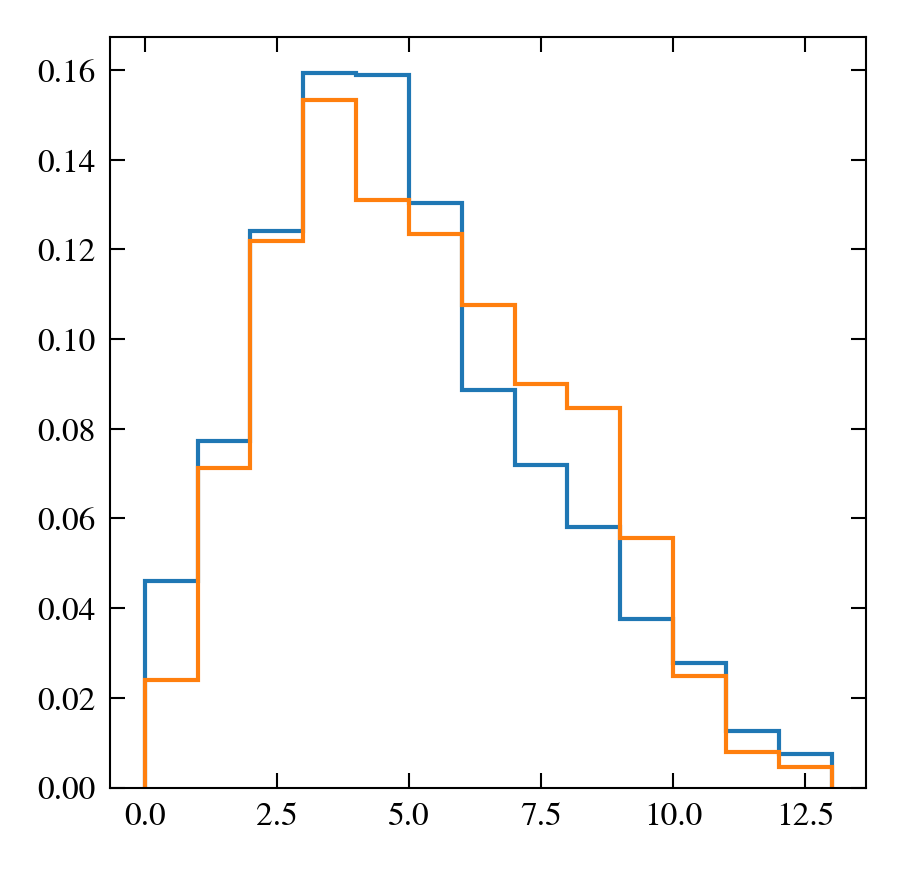

In [64]:
fig, ax = plt.subplots()
age_bins = np.arange(14)
ax.hist(local_sample('L23_AGE'), bins=age_bins, density=True, histtype='step')
ax.hist(local_sample('CN_AGE'), bins=age_bins, density=True, histtype='step')
plt.show()

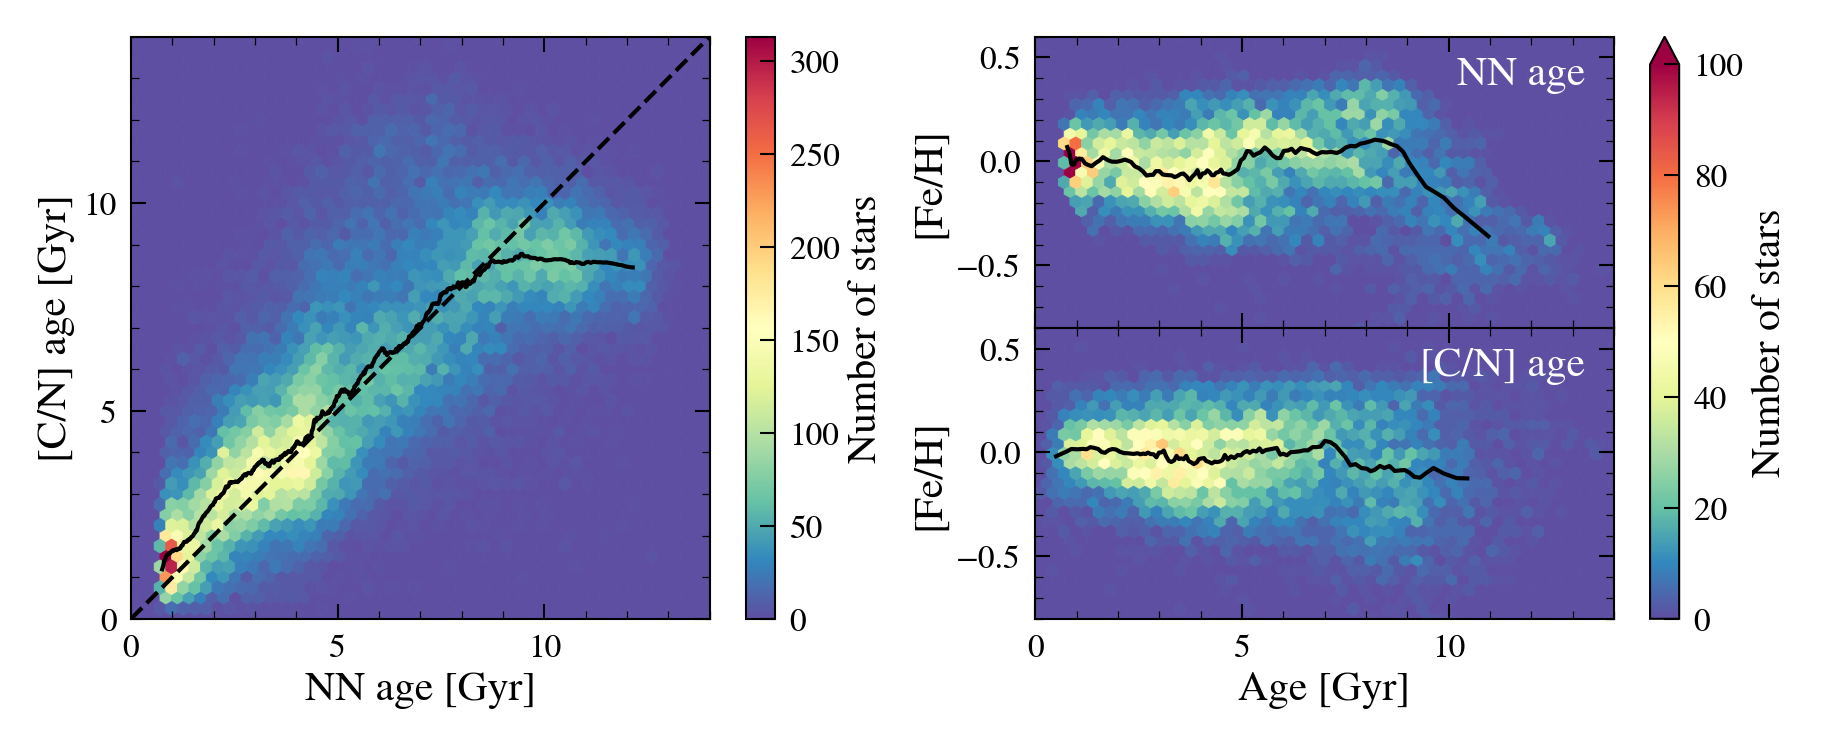

In [141]:
fig = plt.figure(figsize=(TWO_COLUMN_WIDTH, 0.36*TWO_COLUMN_WIDTH))
gs = fig.add_gridspec(2, 2, hspace=0., wspace=0.25)
ax00 = fig.add_subplot(gs[:,0])
ax01 = fig.add_subplot(gs[0,1])
ax01.tick_params(axis='x', labelbottom=False)
ax11 = fig.add_subplot(gs[1,1], sharex=ax01, sharey=ax01)

age_lim = (0, 14)
feh_lim = (-0.8, 0.6)

# Big panel: compare NN and [C/N] ages
all_shared_stars = sample.filter({'L23_AGE': (0, 15), 'CN_AGE': (0, 15)})
pcm00 = ax00.hexbin(
    all_shared_stars('L23_AGE'), all_shared_stars('CN_AGE'),
    gridsize=50, cmap='Spectral_r', linewidths=0.2,
    extent=[age_lim[0], age_lim[1], age_lim[0], age_lim[1]]
)
fig.colorbar(pcm00, ax=ax00, label='Number of stars')
# one-to-one line
ax00.plot(age_lim, age_lim, 'k--')
# Rolling median
sorted_ages = all_shared_stars.data.sort_values('L23_AGE')[['L23_AGE', 'CN_AGE']]
rolling_medians = sorted_ages.rolling(1000, min_periods=100, step=100).median()
ax00.plot(rolling_medians['L23_AGE'], rolling_medians['CN_AGE'], 'k-')
ax00.set_xlabel('NN age [Gyr]')
ax00.set_ylabel('[C/N] age [Gyr]')

# Small panels: age-metallilcity relations
local_shared_stars = local_sample.filter({'L23_AGE': (0, 15), 'CN_AGE': (0, 15)})
axs = [ax01, ax11]
labels = ['NN age', '[C/N] age']
norm = Normalize(vmax=100)
for j, age_col in enumerate(['L23_AGE', 'CN_AGE']):
    pcm = axs[j].hexbin(
        local_shared_stars(age_col), local_shared_stars('FE_H'),
        gridsize=(50, 15), cmap='Spectral_r', norm=norm, linewidths=0.2,
        extent=[age_lim[0], age_lim[1], feh_lim[0], feh_lim[1]]
    )
    # fig.colorbar(pcm, ax=axs[j], aspect=10, shrink=0.9)
    sorted_ages = local_shared_stars.data.sort_values(age_col)[[age_col, 'FE_H']]
    rolling_medians = sorted_ages.rolling(300, min_periods=100, step=100).median()
    axs[j].plot(rolling_medians[age_col], rolling_medians['FE_H'], 'k-')
    axs[j].set_ylabel('[Fe/H]')
    axs[j].set_title(labels[j], y=0.75, x=0.95, color='w', ha='right')
ax11.set_xlabel('Age [Gyr]')
fig.colorbar(pcm, ax=axs, label='Number of stars', extend='max')

ax00.set_xlim(age_lim)
ax00.set_ylim(age_lim)
ax00.xaxis.set_major_locator(MultipleLocator(5))
ax00.xaxis.set_minor_locator(MultipleLocator(1))
ax00.yaxis.set_major_locator(MultipleLocator(5))
ax00.yaxis.set_minor_locator(MultipleLocator(1))
ax01.set_xlim(age_lim)
ax01.set_ylim(feh_lim)
ax01.yaxis.set_major_locator(MultipleLocator(0.5))
ax01.yaxis.set_minor_locator(MultipleLocator(0.1))
ax11.xaxis.set_major_locator(MultipleLocator(5))
ax11.xaxis.set_minor_locator(MultipleLocator(1))
ax11.yaxis.set_major_locator(MultipleLocator(0.5))
ax11.yaxis.set_minor_locator(MultipleLocator(0.1))

plt.show()